In [1]:
import sys
sys.path.append('../')

In [2]:
import numpy
from numpy.linalg import inv, solve
%matplotlib notebook
from matplotlib import pyplot
from scripts.plot_helper import *   # plot_vector, plot_linear_transformation, plot_linear_transformations

**Linear System of Equations**
$$
\begin{align*}
2x + 5y + 3z &= -3 \\
4x + 0y + 8z &= 0 \\
1x + 3y + 0z &= 2
\end{align*}
$$

$$
\underbrace{ \begin{bmatrix}
             2 & 5 & 3 \\
             4 & 0 & 8 \\
             1 & 3 & 0
             \end{bmatrix} }_\text{Transformation}
\overbrace{ \begin{bmatrix}
             x \\
             y \\
             z
             \end{bmatrix} }^\text{Input Vector}
= 
\underbrace{ \begin{bmatrix}
             -3 \\
             0 \\
             2 
             \end{bmatrix} }_\text{Output Vector}
$$

$$
A\vec{x} = \vec{b}
$$

The matrix $A$ $\begin{bmatrix} 2 & 5 & 3 \\ 4 & 0 & 8 \\ 1 & 3 & 0 \end{bmatrix}$ describes the system's linear transformation. We know after applying this tranformation to vector $\vec{x}$, it lands on vector $\vec{b}$ $\begin{bmatrix} -3 \\ 0 \\ 2 \end{bmatrix}$. To solve for $\vec{x}$, we need to find the reverse transformation of A and apply it to vector $\vec{b}$.

**Example**

Using the idea of transformation instead of Gaussian elimination to solve for $x$ and $y$.

$$
\begin{align*}
x + y &= 1 \\
-x + y &= 5
\end{align*}
$$

The system matrix $A$ is $\begin{bmatrix} 1 & 1 \\ -1 & 1 \end{bmatrix}$. Let's visualize this transformation.

<IPython.core.display.Javascript object>


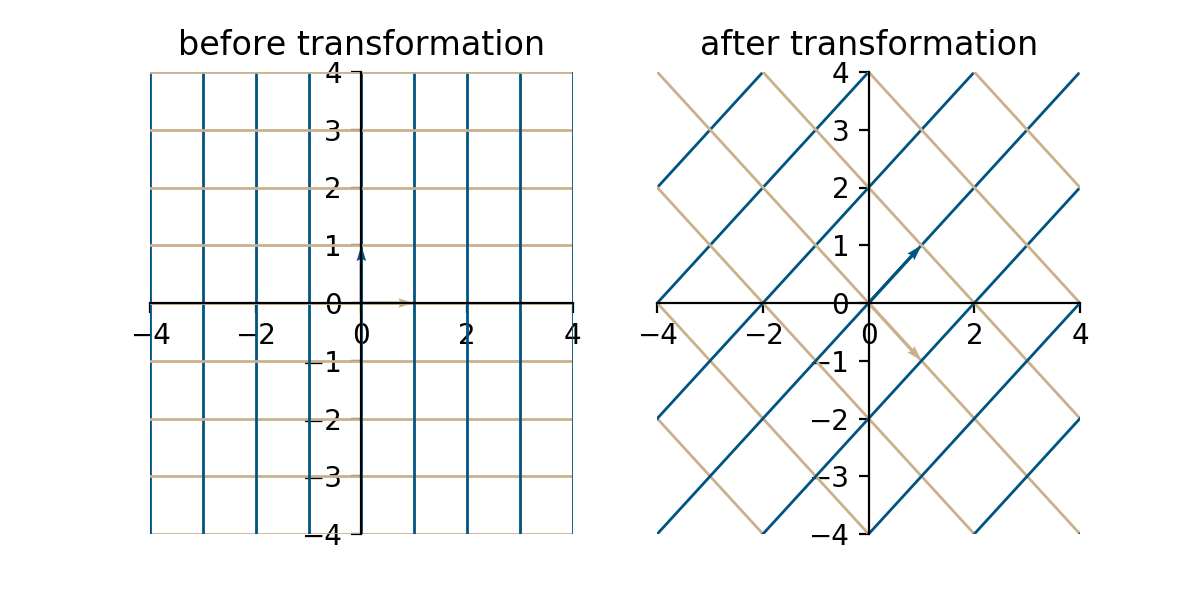

In [3]:
A = numpy.array([[1,1], [-1,1]])
plot_linear_transformation(A)

The transformation A is a 45-degree clockwise rotation, plus a scaling factor of $\sqrt{2}$ (after transformation each grid box has a side length of $\sqrt{2}$). Therefore, the reverse action is to rotate 45 degree counter-clockwise then scale all vectors by $\frac{1}{\sqrt{2}}$. Knowing the relationship between a matrix and its underlying transformation, we can write this reverse rotation matrix as $\begin{bmatrix} 1/2 & -1/2 \\ 1/2 & 1/2 \end{bmatrix}$.

<IPython.core.display.Javascript object>


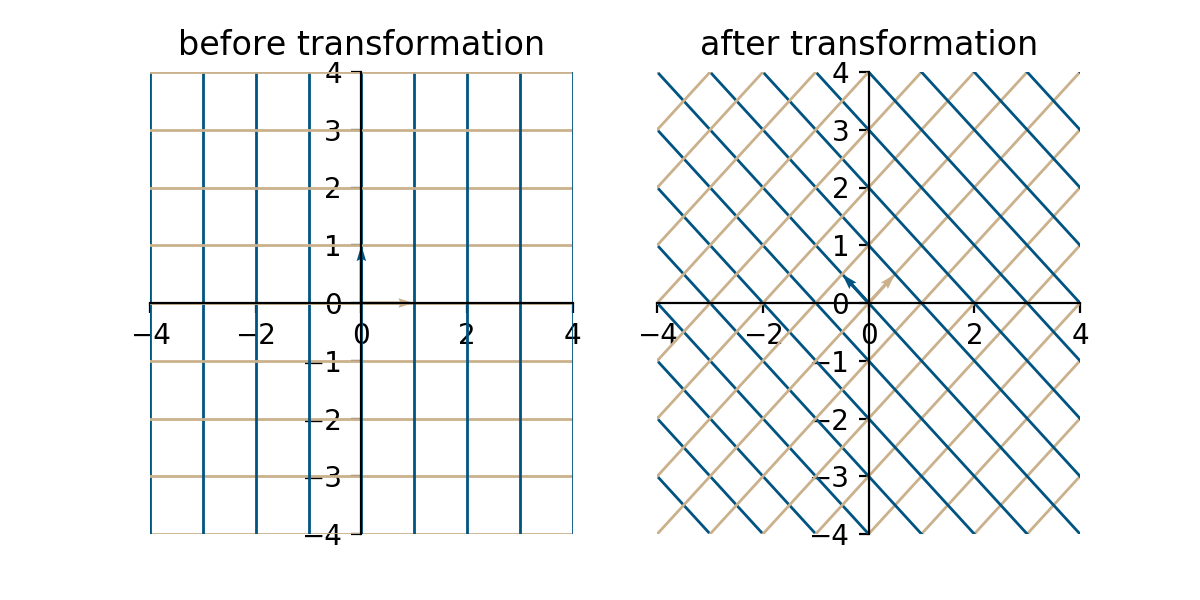

In [4]:
A_inv = numpy.array([[1,-1], [1,1]]) * 1 / 2
plot_linear_transformation(A_inv)

Apply the reverse linear transformation to vector $\vec{b}$ to get the unknown vector $\vec{x}$.

In [5]:
b = numpy.array([[1],[5]])
x = A_inv@b
print(x)

[[-2.]
 [ 3.]]


To check the answer, we can use the builtin inverse function `numpy.linalg.inv`.

In [6]:
A_inv = inv(A)
print(A_inv@b)

[[-2.]
 [ 3.]]


Or use builtin function `numpy.linalg.solve` directly.

In [7]:
print(solve(A, b))

[[-2.]
 [ 3.]]


**3x3 matrix: 3D linear transformation**

[[ 1  0  1]
 [ 1  1  0]
 [-1  1  1]]


<IPython.core.display.Javascript object>


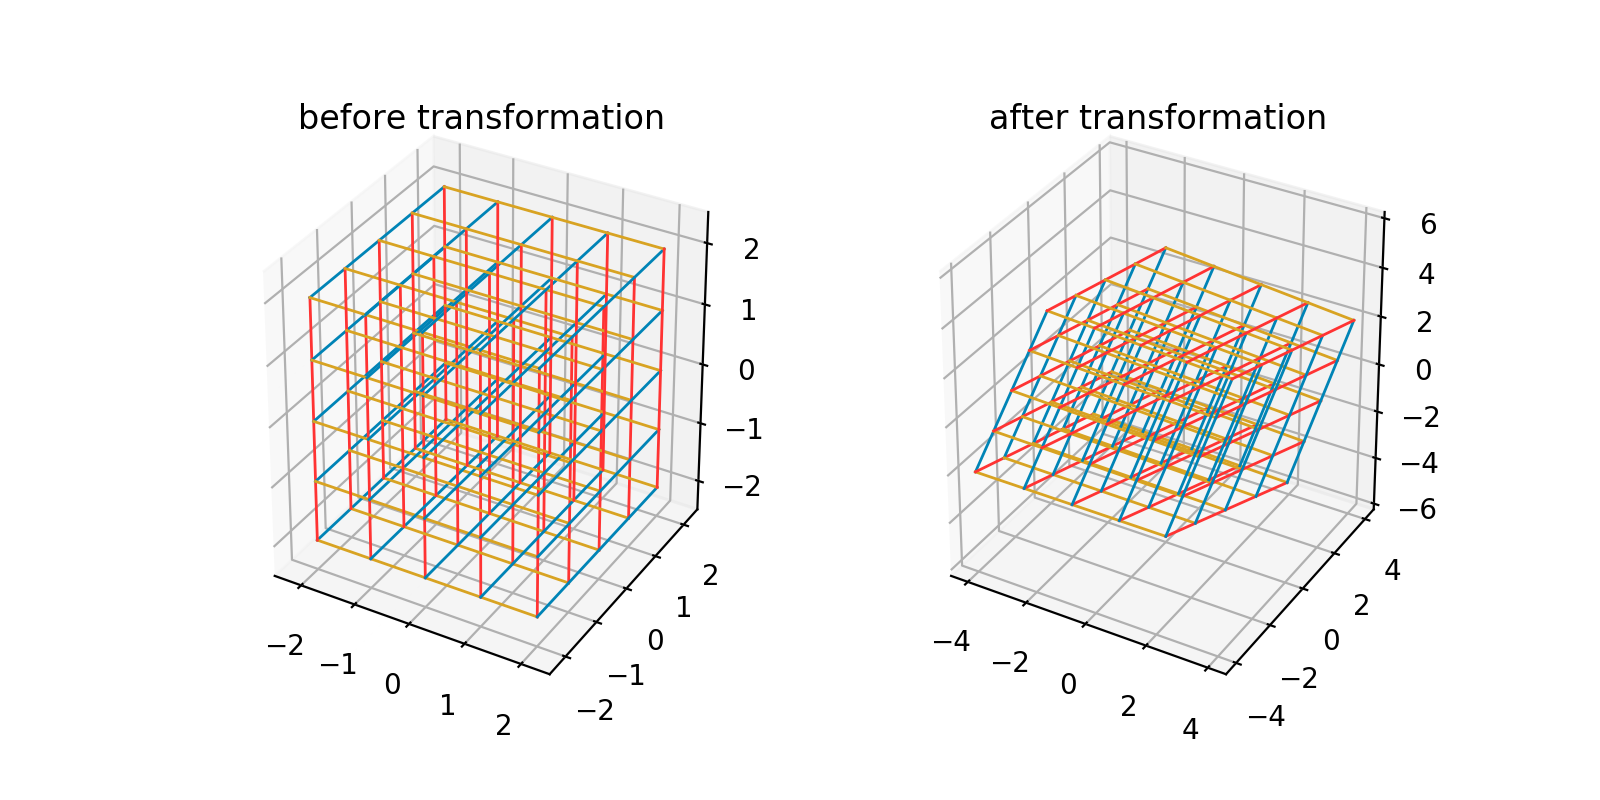

In [8]:
matrix = numpy.array([[1,0,1], [1,1,0], [-1,1,1]])
print(matrix)
plot_3d_linear_transformation(matrix)

**Rank**

- The number of dimensions of the output vectors 
- The dimension of the vector space generated (or spanned) by the matrix's columns.

[[ 1  2  7]
 [ 0  1  3]
 [-3  1  0]]


<IPython.core.display.Javascript object>


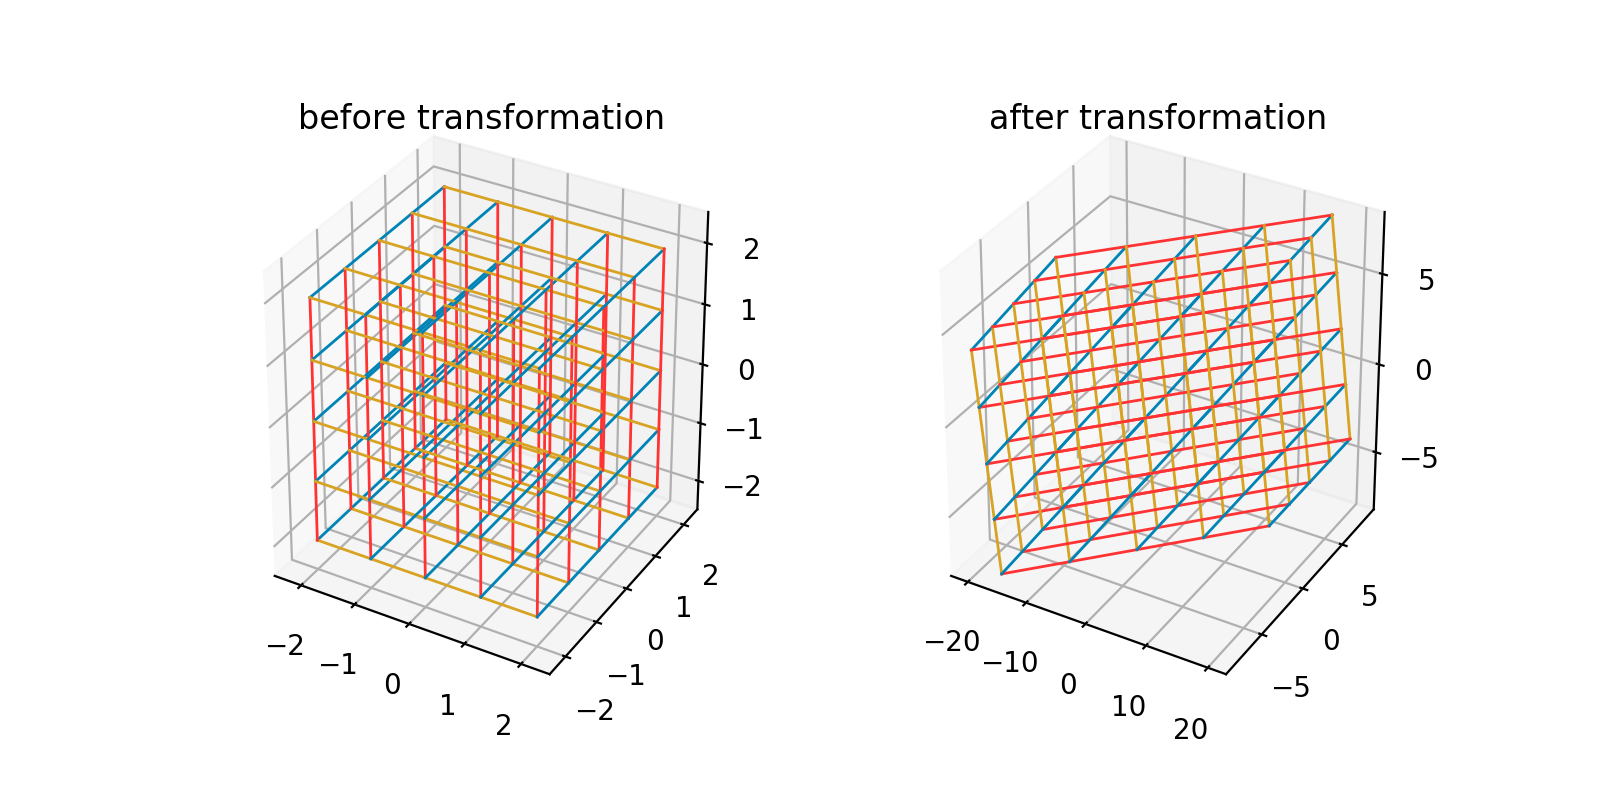

In [9]:
# rank 2 example
A = numpy.array([[1,2,7], [0,1,3], [-3,1,0]])
print(A)
plot_3d_linear_transformation(A)

[[ 1  2  1]
 [-1 -2 -1]
 [ 3  6  3]]


<IPython.core.display.Javascript object>


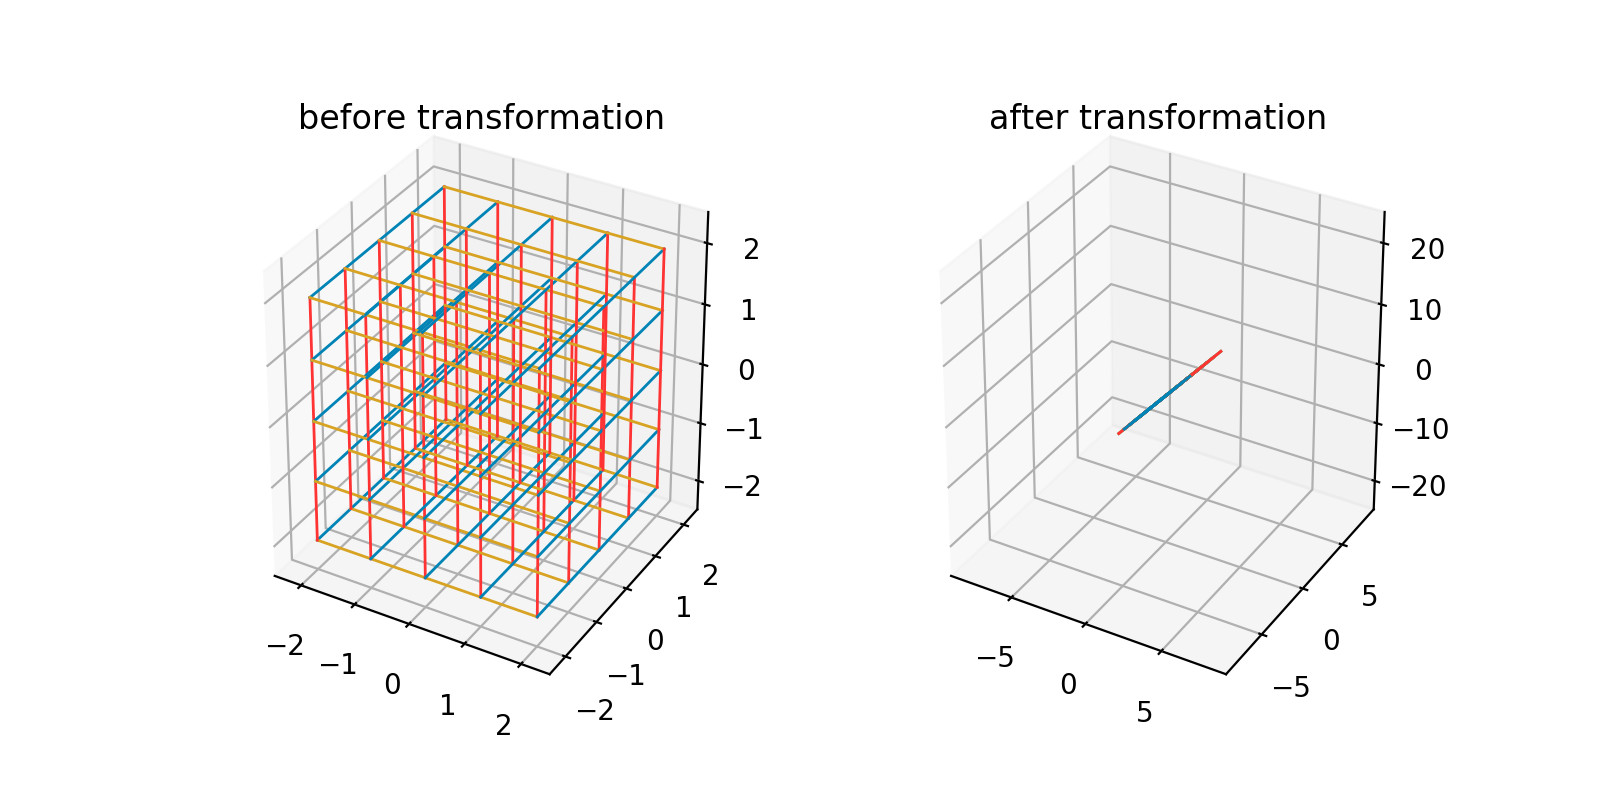

In [10]:
# rank 1 example
B = numpy.array([[1,2,1], [-1,-2,-1], [3,6,3]])
print(B)
plot_3d_linear_transformation(B)

- Full Rank: the dimension of vector space generated by the transformation equals to the number of the matrix columns

**Can we solve a system of equations where the system matrix A is not full rank?**

In [11]:
inv(A)

array([[ 2.57348550e+15, -6.00479950e+15,  8.57828500e+14],
       [ 7.72045650e+15, -1.80143985e+16,  2.57348550e+15],
       [-2.57348550e+15,  6.00479950e+15, -8.57828500e+14]])

The inverse does not exist when the matrix is not full rank (we cannot find the reverse transformation)

not invertible = singular = has a zero determinant = is not full rank